In [1]:
# Import required packages
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import numpy as np
import logging
import pyLDAvis.gensim
import json

from gensim.models import wrappers, TfidfModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from nltk.corpus import stopwords
from gensim.models import Phrases
from pprint import pprint
from wordcloud import WordCloud

C:\Users\RachnaGupta\Anaconda3\lib\site-packages\_pytest\fixtures.py:844: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  params = attr.ib(convert=attr.converters.optional(tuple))
C:\Users\RachnaGupta\Anaconda3\lib\site-packages\_pytest\fixtures.py:846: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  ids = attr.ib(default=None, convert=_ensure_immutable_ids)
C:\Users\RachnaGupta\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
import seaborn as sns
import matplotlib.colors as mcolors

In [3]:
import pickle

In [88]:
# load the model from disk
lda_model = pickle.load(open('lda_model.sav', 'rb'))
dict_df = pickle.load(open('dict.sav', 'rb'))
dominant_df = pd.read_csv("dominant_topic_df.csv")

In [89]:
lda_model

In [160]:
df = pd.read_csv('Scrapped_data.csv')
df.head()

,Data,Clean_Data,bow
0,Generation Gap occurs when there is a consider...,generation occurs considerable difference enti...,"[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1..."
1,Globalization is the process used by businesse...,globalization business organization especially...,"[(2, 1), (4, 1), (5, 2), (9, 3), (12, 1), (14,..."
2,Music is the art of expressing ideas and emoti...,music expressing idea emotion significant soun...,"[(4, 2), (14, 1), (16, 10), (19, 5), (30, 1), ..."
3,"Hobby is the favorite activity, habit or choic...",hobby favorite activity habit choice person re...,"[(4, 3), (5, 1), (16, 5), (19, 2), (20, 1), (3..."
4,Money is the medium used by people to buy requ...,money medium people required good service sour...,"[(13, 1), (14, 2), (30, 1), (32, 4), (43, 1), ..."


In [161]:
list_rows=list()
for row in df['Clean_Data']:
    list_rows.append(row.split())

dominant_df["Text"]=list_rows
#df["Clean_Data"]=list_rows
len(dominant_df["Text"][0])

930

In [167]:
doc_bow = [dict_df.doc2bow(doc) for doc in dominant_df["Text"]]
df["bow"]=doc_bow

In [103]:
dominant_df.head()

,Document_No,Score,Dominant_Topic,Dominant_Topic_number,Topic_Keywords,Text
0,0,0.4698,people,4,"people, country, science, technology, india, p...","[generation, occurs, considerable, difference,..."
1,1,0.8617,people,4,"people, country, science, technology, india, p...","[globalization, business, organization, especi..."
2,2,0.4650,life,3,"life, school, student, teacher, child, friend,...","[music, expressing, idea, emotion, significant..."
3,3,0.6232,life,3,"life, school, student, teacher, child, friend,...","[hobby, favorite, activity, habit, choice, per..."
4,4,0.8898,life,2,"life, people, time, education, work, country, ...","[money, medium, people, required, good, servic..."


In [7]:
dict_df

In [168]:
#for words in dominant_df["Text"]:
    #print(len(words))
    #print(len(list_rows))

In [118]:
lda_model.print_topics()

[(0,
  '0.030*"india" + 0.018*"people" + 0.015*"country" + 0.009*"cleanliness" + 0.009*"caste" + 0.008*"health" + 0.008*"government" + 0.008*"indian" + 0.008*"campaign" + 0.006*"system"'),
 (1,
  '0.015*"time" + 0.014*"family" + 0.012*"festival" + 0.011*"summer" + 0.010*"vacation" + 0.009*"love" + 0.008*"year" + 0.008*"place" + 0.008*"people" + 0.007*"beautiful"'),
 (2,
  '0.017*"life" + 0.016*"people" + 0.014*"time" + 0.010*"education" + 0.008*"work" + 0.008*"country" + 0.008*"help" + 0.007*"sport" + 0.006*"need" + 0.006*"person"'),
 (3,
  '0.019*"life" + 0.018*"school" + 0.015*"student" + 0.015*"teacher" + 0.014*"child" + 0.013*"friend" + 0.009*"people" + 0.009*"mother" + 0.007*"always" + 0.007*"love"'),
 (4,
  '0.014*"people" + 0.013*"country" + 0.009*"science" + 0.008*"technology" + 0.008*"india" + 0.008*"population" + 0.008*"world" + 0.007*"life" + 0.007*"government" + 0.006*"various"'),
 (5,
  '0.024*"pollution" + 0.023*"woman" + 0.010*"plastic" + 0.009*"road" + 0.009*"india" + 0

## Frequency Distribution of Word Counts in Documents

length of each document(count of words) plotted. It looks like mean of documents word count is 9894.

In [114]:
doc_len = [len(words) for words in dominant_df['Text']]
len(doc_len)

360

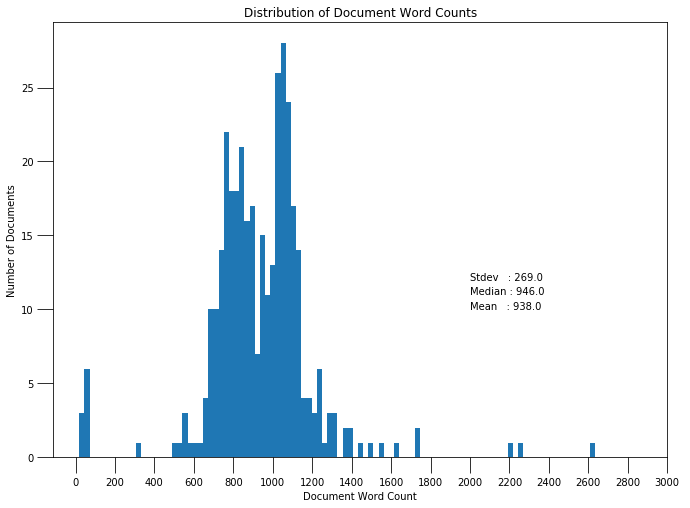

In [119]:
# Plot
plt.figure(figsize=(11, 8))#, dpi=100)
plt.hist(doc_len, bins=100)
plt.text(2000, 10, r"Mean   : " + str(round(np.mean(doc_len))))
plt.text(2000,  11, r"Median : " + str(round(np.median(doc_len))))
plt.text(2000,  12, r"Stdev   : " + str(round(np.std(doc_len))))

plt.title('Distribution of Document Word Counts')
plt.gca().set(ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,3000,16))
plt.show()

As the mean is 938 ans std deviation around 270, we will remove documents with length +-500 from 950 i.e. 1450 and 450

In [120]:
#Length of documents
dominant_df['Length_of_Documents']=dominant_df['Text'].apply(lambda x: len(x))
#df.sort_values('Length_of_Documents',inplace=True,ascending=True)

In [137]:
new_df = dominant_df.loc[dominant_df['Length_of_Documents'] >450]
new_df.sort_values('Length_of_Documents',inplace=True,ascending=True)
new_df.head()

,Document_No,Score,Dominant_Topic,Dominant_Topic_number,Topic_Keywords,Text,Length_of_Documents
122,122,0.3967,time,1,"time, family, festival, summer, vacation, love...","[makar, sankranti, significant, festival, hind...",497
223,223,0.9779,life,3,"life, school, student, teacher, child, friend,...","[love, come, even, close, love, mother, feel, ...",531
164,164,0.7775,pollution,5,"pollution, woman, plastic, road, india, child,...","[provided, variety, issue, problem, faced, wom...",551
279,279,0.4004,time,1,"time, family, festival, summer, vacation, love...","[india, celebrate, numerous, festival, ritual,...",553
278,278,0.5044,pollution,5,"pollution, woman, plastic, road, india, child,...","[pollution, existence, contaminant, environmen...",567


## Length of documents

Text(0,0.5,'Document Number')

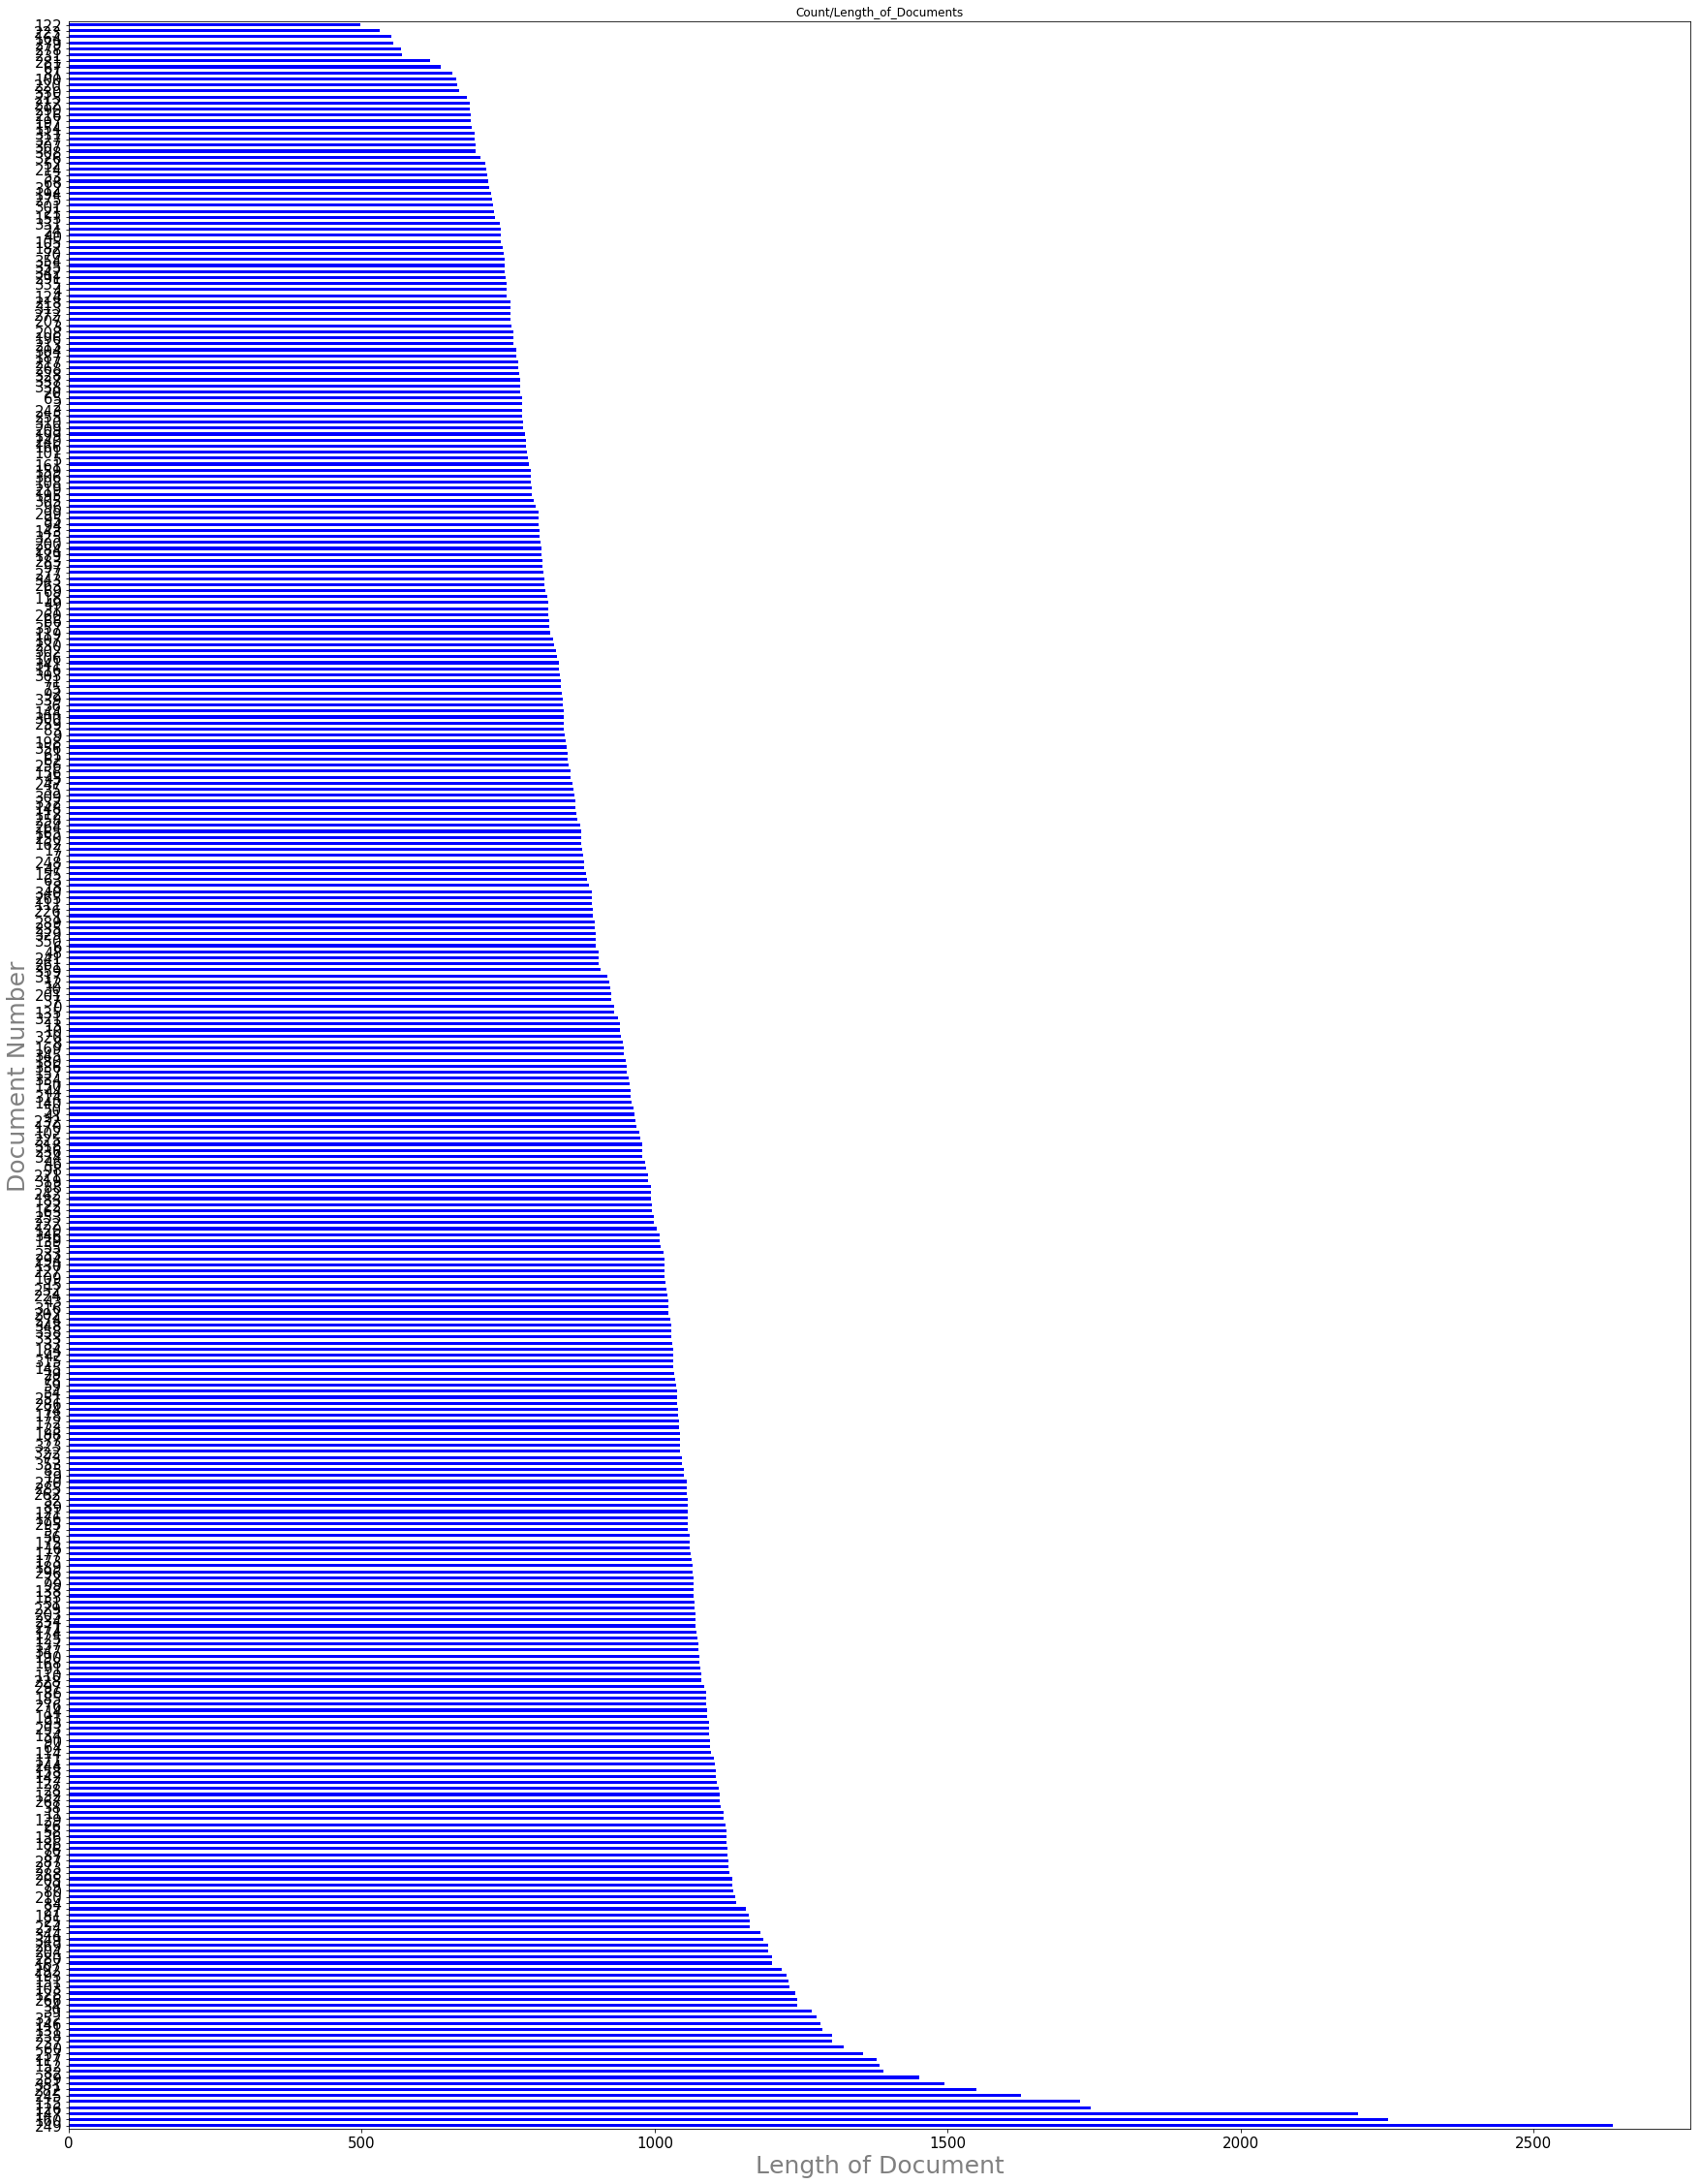

In [155]:
column_name='Length_of_Documents'
plt.figure(figsize=(30, 40))
#fig,ax=plt.subplots(1,1,figsize=(30,40))

#To change color of bar use m-magenta,c-cyan,r-red,g-green,b-blue
new_df[column_name].plot(kind='barh',title='Count/'+column_name,fontsize=15,color='Blue')

#title='COUNT/'+column_name
#ax.set_title(title,fontsize= 25,color='Gray')
plt.gca().invert_yaxis()
plt.xlabel('Length of Document',fontsize=25,color='Gray')
plt.ylabel('Document Number',fontsize=25,color='Gray')

#fig.tight_layout()

In [83]:
dominant_df.columns

Index(['Document_No', 'Score', 'Dominant_Topic', 'Dominant_Topic_number',
       'Topic_Keywords', 'Text'],
      dtype='object')

In [91]:
dominant_df.loc[dominant_df.Dominant_Topic_number ==str(3)].head()
#dominant_df.loc[dominant_df.Dominant_Topic_number == str(1)]

,Document_No,Score,Dominant_Topic,Dominant_Topic_number,Topic_Keywords,Text
0,0,0.9991,life,3,"life, people, education, time, family, work, l...","[generation, occurs, considerable, difference,..."
4,4,0.7457,life,3,"life, people, education, time, family, work, l...","[money, medium, people, required, good, servic..."
7,7,0.6767,life,3,"life, people, education, time, family, work, l...","[leadership, quality, give, edge, others, lead..."
10,10,0.9791,life,3,"life, people, education, time, family, work, l...","[everyone, ambition, child, fascinated, severa..."
12,12,0.8415,life,3,"life, people, education, time, family, work, l...","[person, know, completely, however, still, peo..."


In [109]:
l = dominant_df.loc[dominant_df.Dominant_Topic_number ==str(1)]
list_len = [len(docs) for docs in l.Text]
len(list_len)

12

In [ ]:
l0 = dominant_df.loc[dominant_df.Dominant_Topic_number ==str(0)]
l0
[len(word) for word in l0.Text]

## Distribution of Length of documents which belong to a particular topic

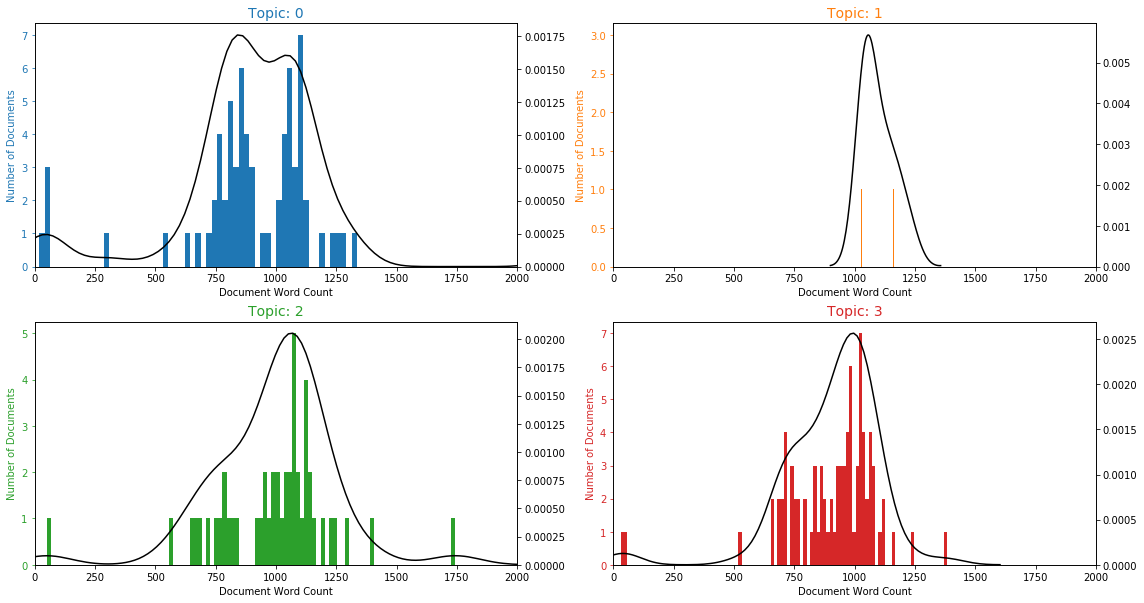

In [153]:
fig, axes = plt.subplots(2,2, figsize=(16,9))
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    l = dominant_df.loc[dominant_df.Dominant_Topic_number ==str(i)]
    d = [len(docs) for docs in l.Text]
    ax.hist(d, bins=100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(d, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 2000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=14, color=cols[i]))
    
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,2000,9))
plt.show()

In [173]:
topics = lda_model.show_topics(formatted=False)
wordcloud = WordCloud(width=2500,height=1800, max_words=10, background_color='white', max_font_size= 400, min_font_size=10, font_step=80)
print(' '.join([word[0] for word in topics[0][1]]))
print([word for word in topics[0][1]])

india people country cleanliness caste health government indian campaign system
[('india', 0.029909603), ('people', 0.017937988), ('country', 0.014926829), ('cleanliness', 0.009347424), ('caste', 0.00862499), ('health', 0.0082289735), ('government', 0.007792522), ('indian', 0.007725734), ('campaign', 0.007691068), ('system', 0.0064845923)]


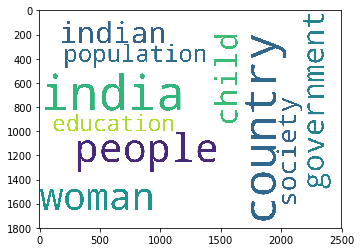

In [171]:
map_topics_freq = dict([word for word in topics[0][1]])
plt.imshow(wordcloud.generate_from_frequencies(map_topics_freq))

## We will create Wordcloud for all first 4 topics

This will have 10 words with their frequencies which contribute majorly for the topic.

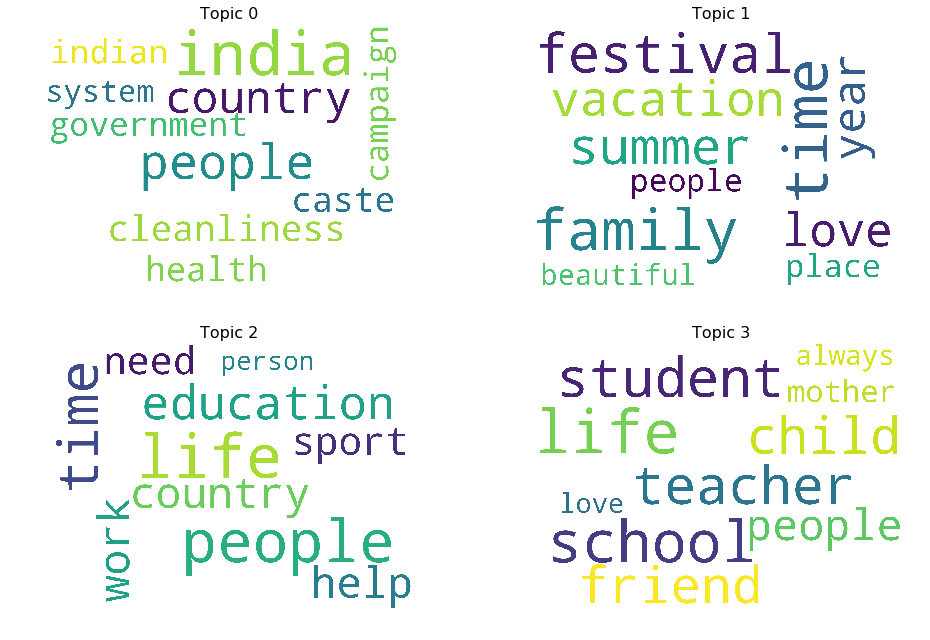

In [193]:
fig, axes = plt.subplots(2,2, figsize=(14,9))
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax, cols[i])
    map_topics_freq = dict([word for word in topics[i][1]])
    #print(map_topics_freq)
    plt.gca().imshow(wordcloud.generate_from_frequencies(map_topics_freq))
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()

## Frequency of a words which contribute to topic formation.

We will count how many times a topic word comes in a document. We have 360 documents. We will use counter to get number of times a topic word is coming a doc. 

Often there are words that occur in multiple topics and their relative frequency is more than their weight. Such words are usually less important. We can see in the bar graph below.

In [74]:
from collections import Counter

In [191]:
doc_len = [d for doc in dominant_df['Text'] for d in doc] 
counter = Counter(doc_len)
counter["india"]

2960

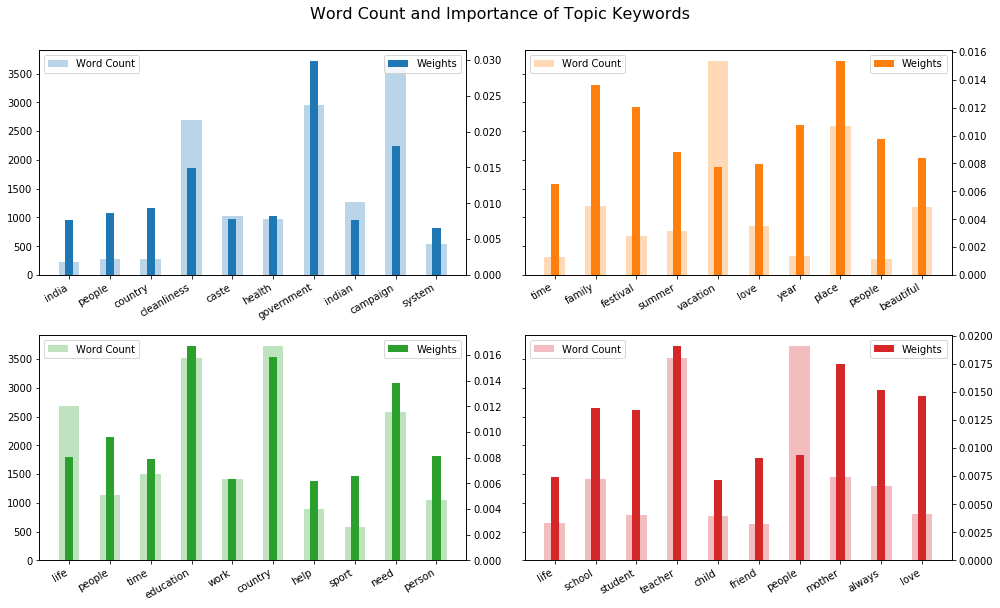

In [212]:
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])
out_df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 

fig, axes = plt.subplots(2, 2, figsize=(14,8), sharey=True)
#p=dict([word for word in topics[0][1]])

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    ax.bar(x='word', height="word_count", data=out_df.loc[out_df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    # Plotting weights
    ax_twin.bar(x='word', height="importance", data=out_df.loc[out_df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_xticklabels(out_df.loc[out_df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); 
    ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=16, y=1.05)    
plt.show()

usinf PyLDAvis is another way of checking which word is present in doc and what is it's overall frequency inthe docs. It is Topic major unlike our model which is document major.

In [171]:
lda_display = pyLDAvis.gensim.prepare(lda_model, dictionary=dict_df, corpus=df['bow'])
pyLDAvis.display(lda_display)

In [ ]:
t-SNE Clustering Chart